# Libraries for Churn Prediction :-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score ,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Dataset :-

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head(20))

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male      

### Summary of dataset using .info() method

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking null values in dataset

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking duplicate values of dataset using .duplicated() method

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop('customerID',axis=1,inplace=True)

In [12]:
df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

# Data Cleaning and Preprocessing :-

In [14]:
# converting values to numeric

numeric_gender = []

for x in df['gender']:
    if(x == 'Male'):
        numeric_gender.append(1)
    else:
        numeric_gender.append(0)

df['gender'] = numeric_gender

In [15]:
numeric_partner = []

for x in df['Partner']:
    if(x == 'Yes'):
        numeric_partner.append(1)
    else:
        numeric_partner.append(0)

df['Partner'] = numeric_partner    

In [16]:
numeric_dependents = []

for x in df['Dependents']:
    if(x == 'Yes'):
        numeric_dependents.append(1)
    else:
        numeric_dependents.append(0)

df['Dependents'] = numeric_dependents

In [17]:
numeric_phoneservice = []

for x in df['PhoneService']:
    if(x == 'Yes'):
        numeric_phoneservice.append(1)
    else:
        numeric_phoneservice.append(0)

df['PhoneService'] = numeric_phoneservice

In [18]:
numeric_paperlessbilling = []

for x in df['PaperlessBilling']:
    if(x == 'Yes'):
        numeric_paperlessbilling.append(1)
    else:
        numeric_paperlessbilling.append(0)

df['PaperlessBilling'] = numeric_paperlessbilling

In [19]:
numeric_churn = []

for x in df['Churn']:
    if(x == 'Yes'):
        numeric_churn.append(1)
    else:
        numeric_churn.append(0)

df['Churn'] = numeric_churn

In [20]:
# labelencoder

LE = LabelEncoder()

df['MultipleLines'] = LE.fit_transform(df['MultipleLines'])
df['InternetService'] = LE.fit_transform(df['InternetService'])
df['OnlineSecurity'] = LE.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LE.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = LE.fit_transform(df['DeviceProtection'])
df['TechSupport'] = LE.fit_transform(df['TechSupport'])
df['StreamingTV'] = LE.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LE.fit_transform(df['StreamingMovies'])
df['Contract'] = LE.fit_transform(df['Contract'])
df['PaymentMethod'] = LE.fit_transform(df['PaymentMethod'])
df['TotalCharges'] = LE.fit_transform(df['TotalCharges'])

In [21]:
# normalization 

rescale = MinMaxScaler()


df['MultipleLines'] = rescale.fit_transform(df[['MultipleLines']])
df['InternetService'] = rescale.fit_transform(df[['InternetService']])
df['OnlineSecurity'] = rescale.fit_transform(df[['OnlineSecurity']])
df['OnlineBackup'] = rescale.fit_transform(df[['OnlineBackup']])
df['DeviceProtection'] = rescale.fit_transform(df[['DeviceProtection']])
df['TechSupport'] = rescale.fit_transform(df[['TechSupport']])
df['StreamingTV'] = rescale.fit_transform(df[['StreamingTV']])
df['StreamingMovies'] = rescale.fit_transform(df[['StreamingMovies']])
df['Contract'] = rescale.fit_transform(df[['Contract']])
df['PaymentMethod'] = rescale.fit_transform(df[['PaymentMethod']])
df['TotalCharges'] = rescale.fit_transform(df[['TotalCharges']])

In [22]:
# Standarization

scaler = StandardScaler()

df['MultipleLines'] = scaler.fit_transform(df[['MultipleLines']])
df['InternetService'] = scaler.fit_transform(df[['InternetService']])
df['OnlineSecurity'] = scaler.fit_transform(df[['OnlineSecurity']])
df['OnlineBackup'] = scaler.fit_transform(df[['OnlineBackup']])
df['DeviceProtection'] = scaler.fit_transform(df[['DeviceProtection']])
df['TechSupport'] = scaler.fit_transform(df[['TechSupport']])
df['StreamingTV'] = scaler.fit_transform(df[['StreamingTV']])
df['StreamingMovies'] = scaler.fit_transform(df[['StreamingMovies']])
df['Contract'] = scaler.fit_transform(df[['Contract']])
df['PaymentMethod'] = scaler.fit_transform(df[['PaymentMethod']])
df['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

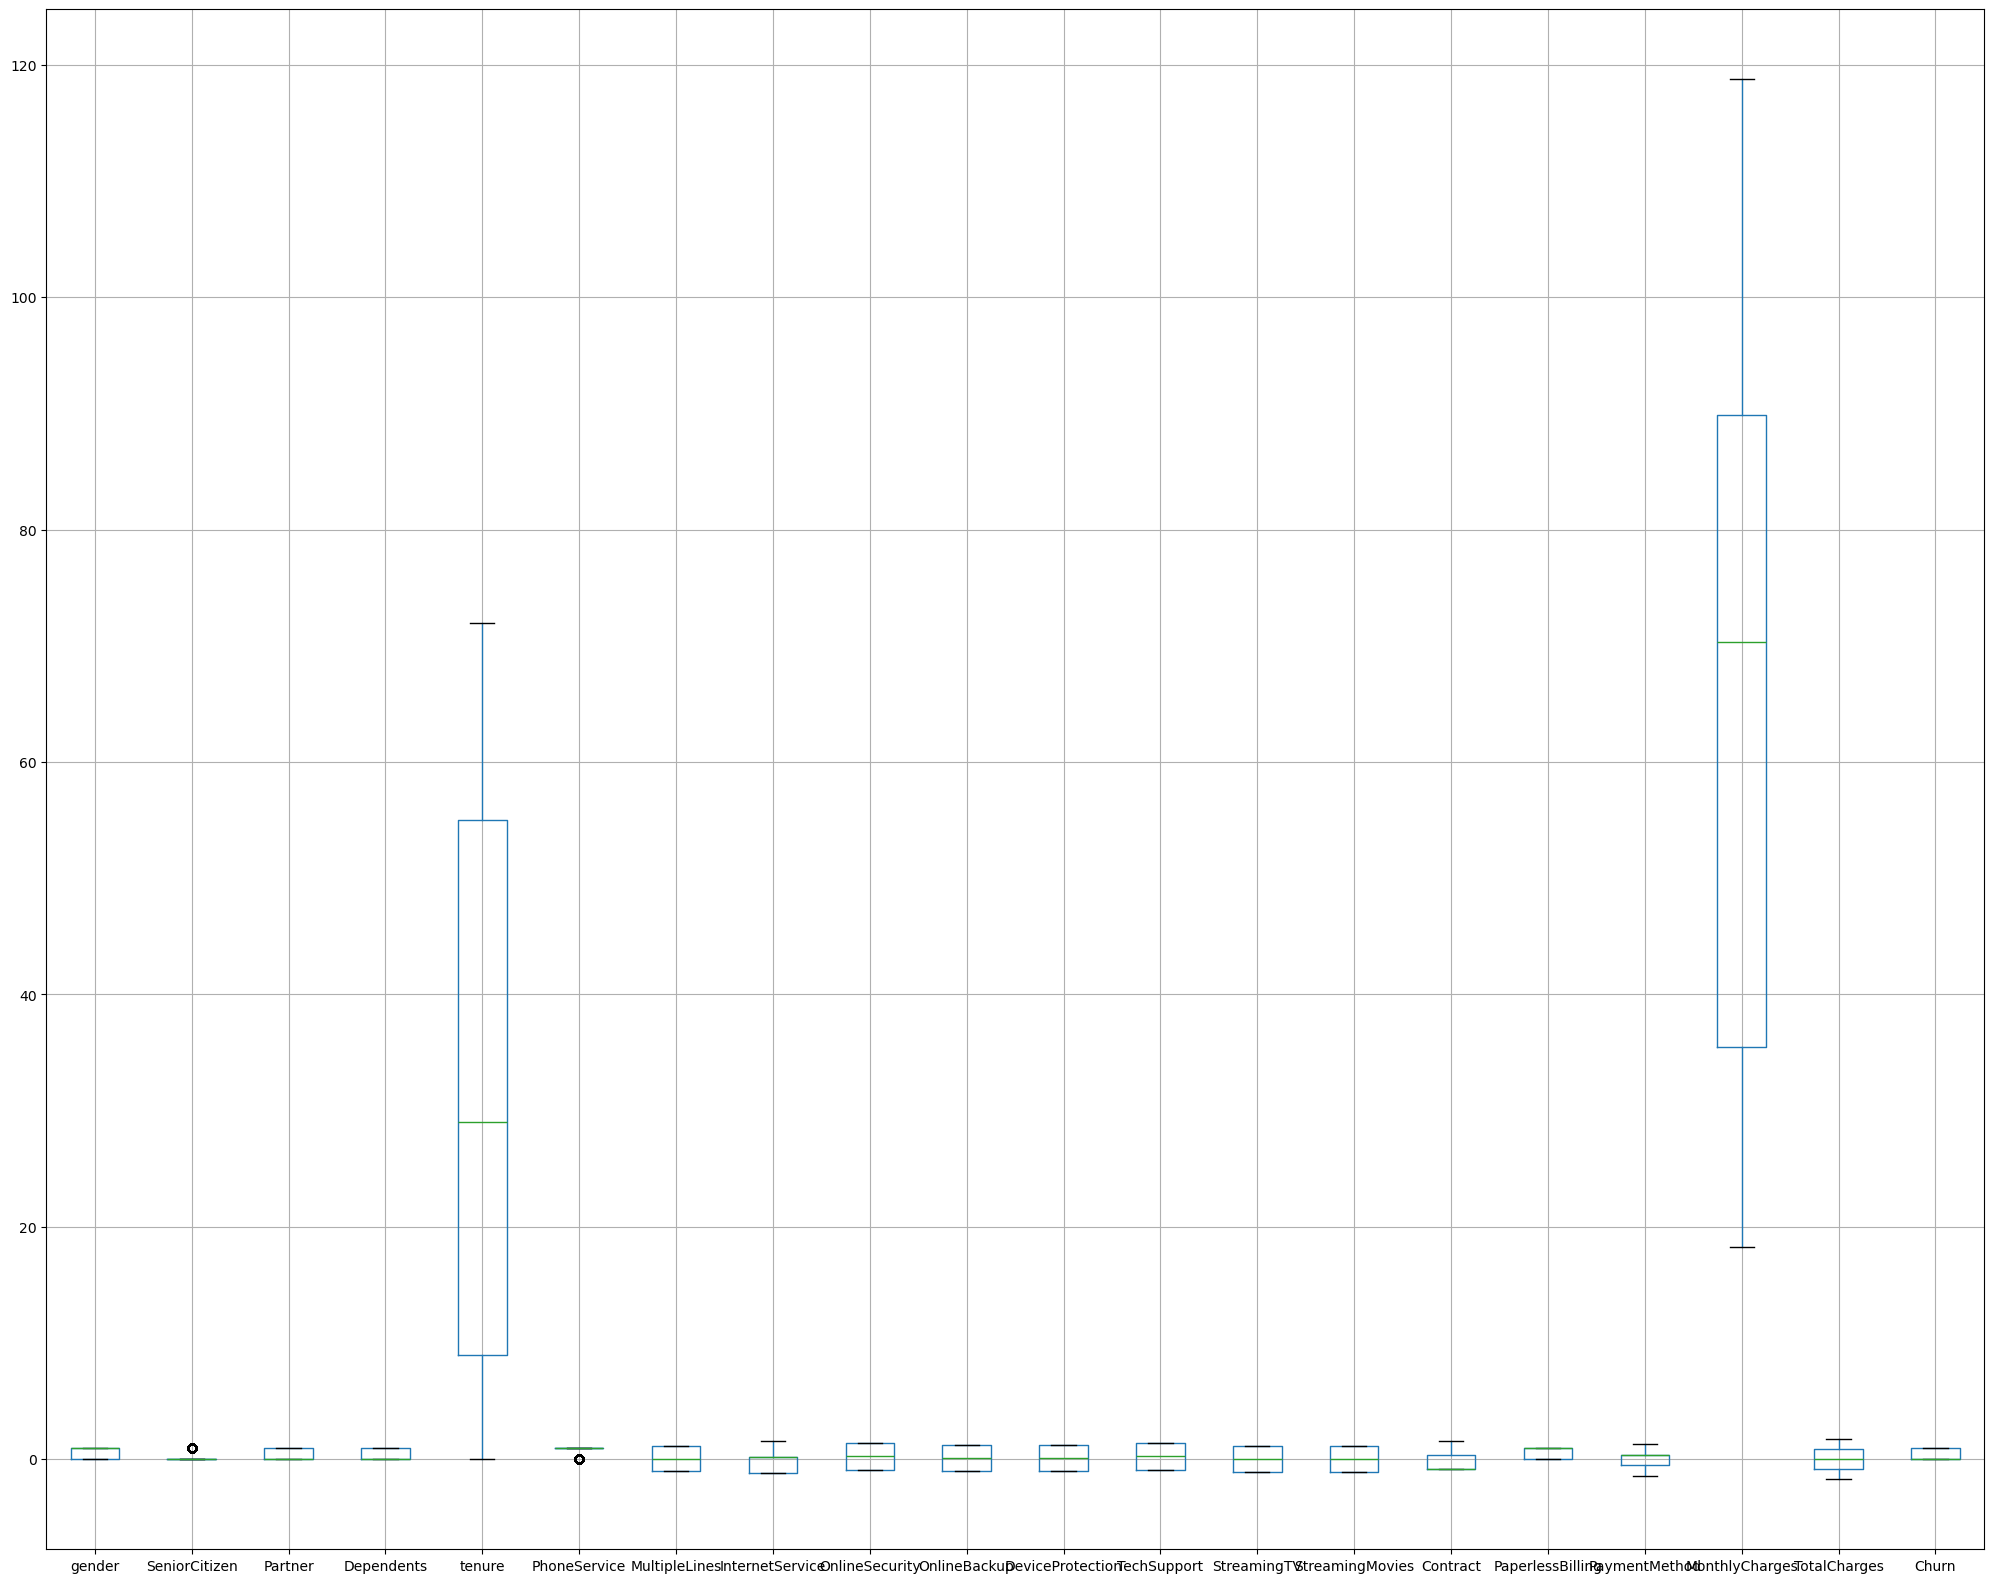

In [23]:
df.boxplot(figsize=(25,20))
plt.show()

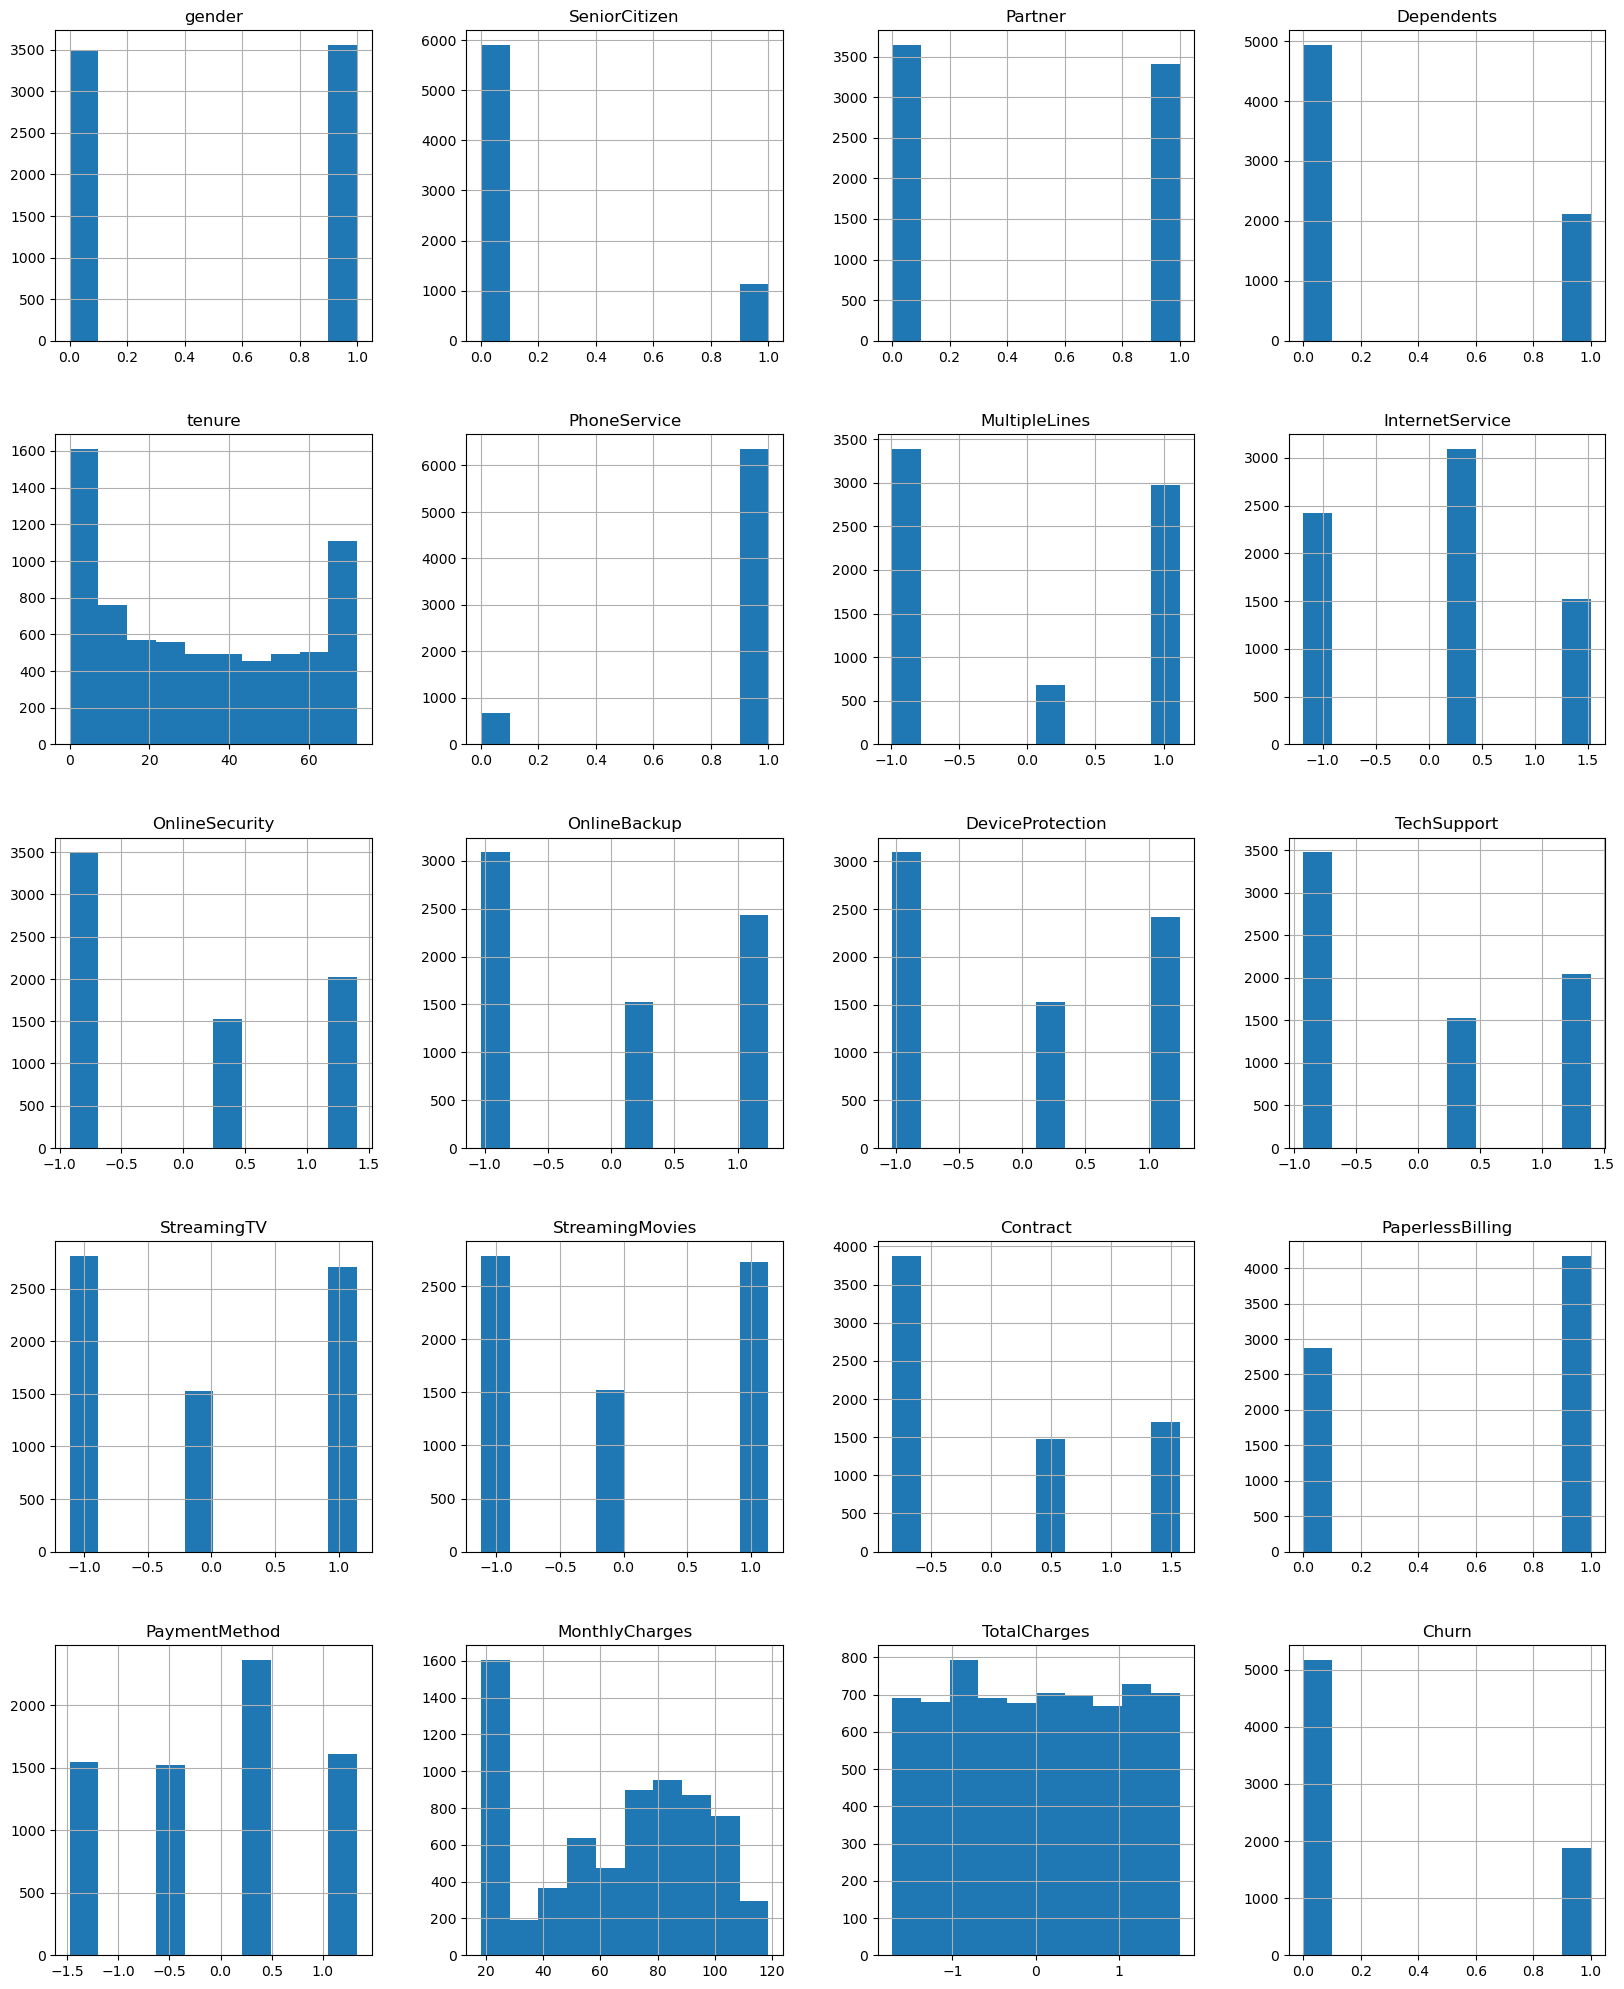

In [24]:
df.hist(figsize=(20,25))
plt.show()

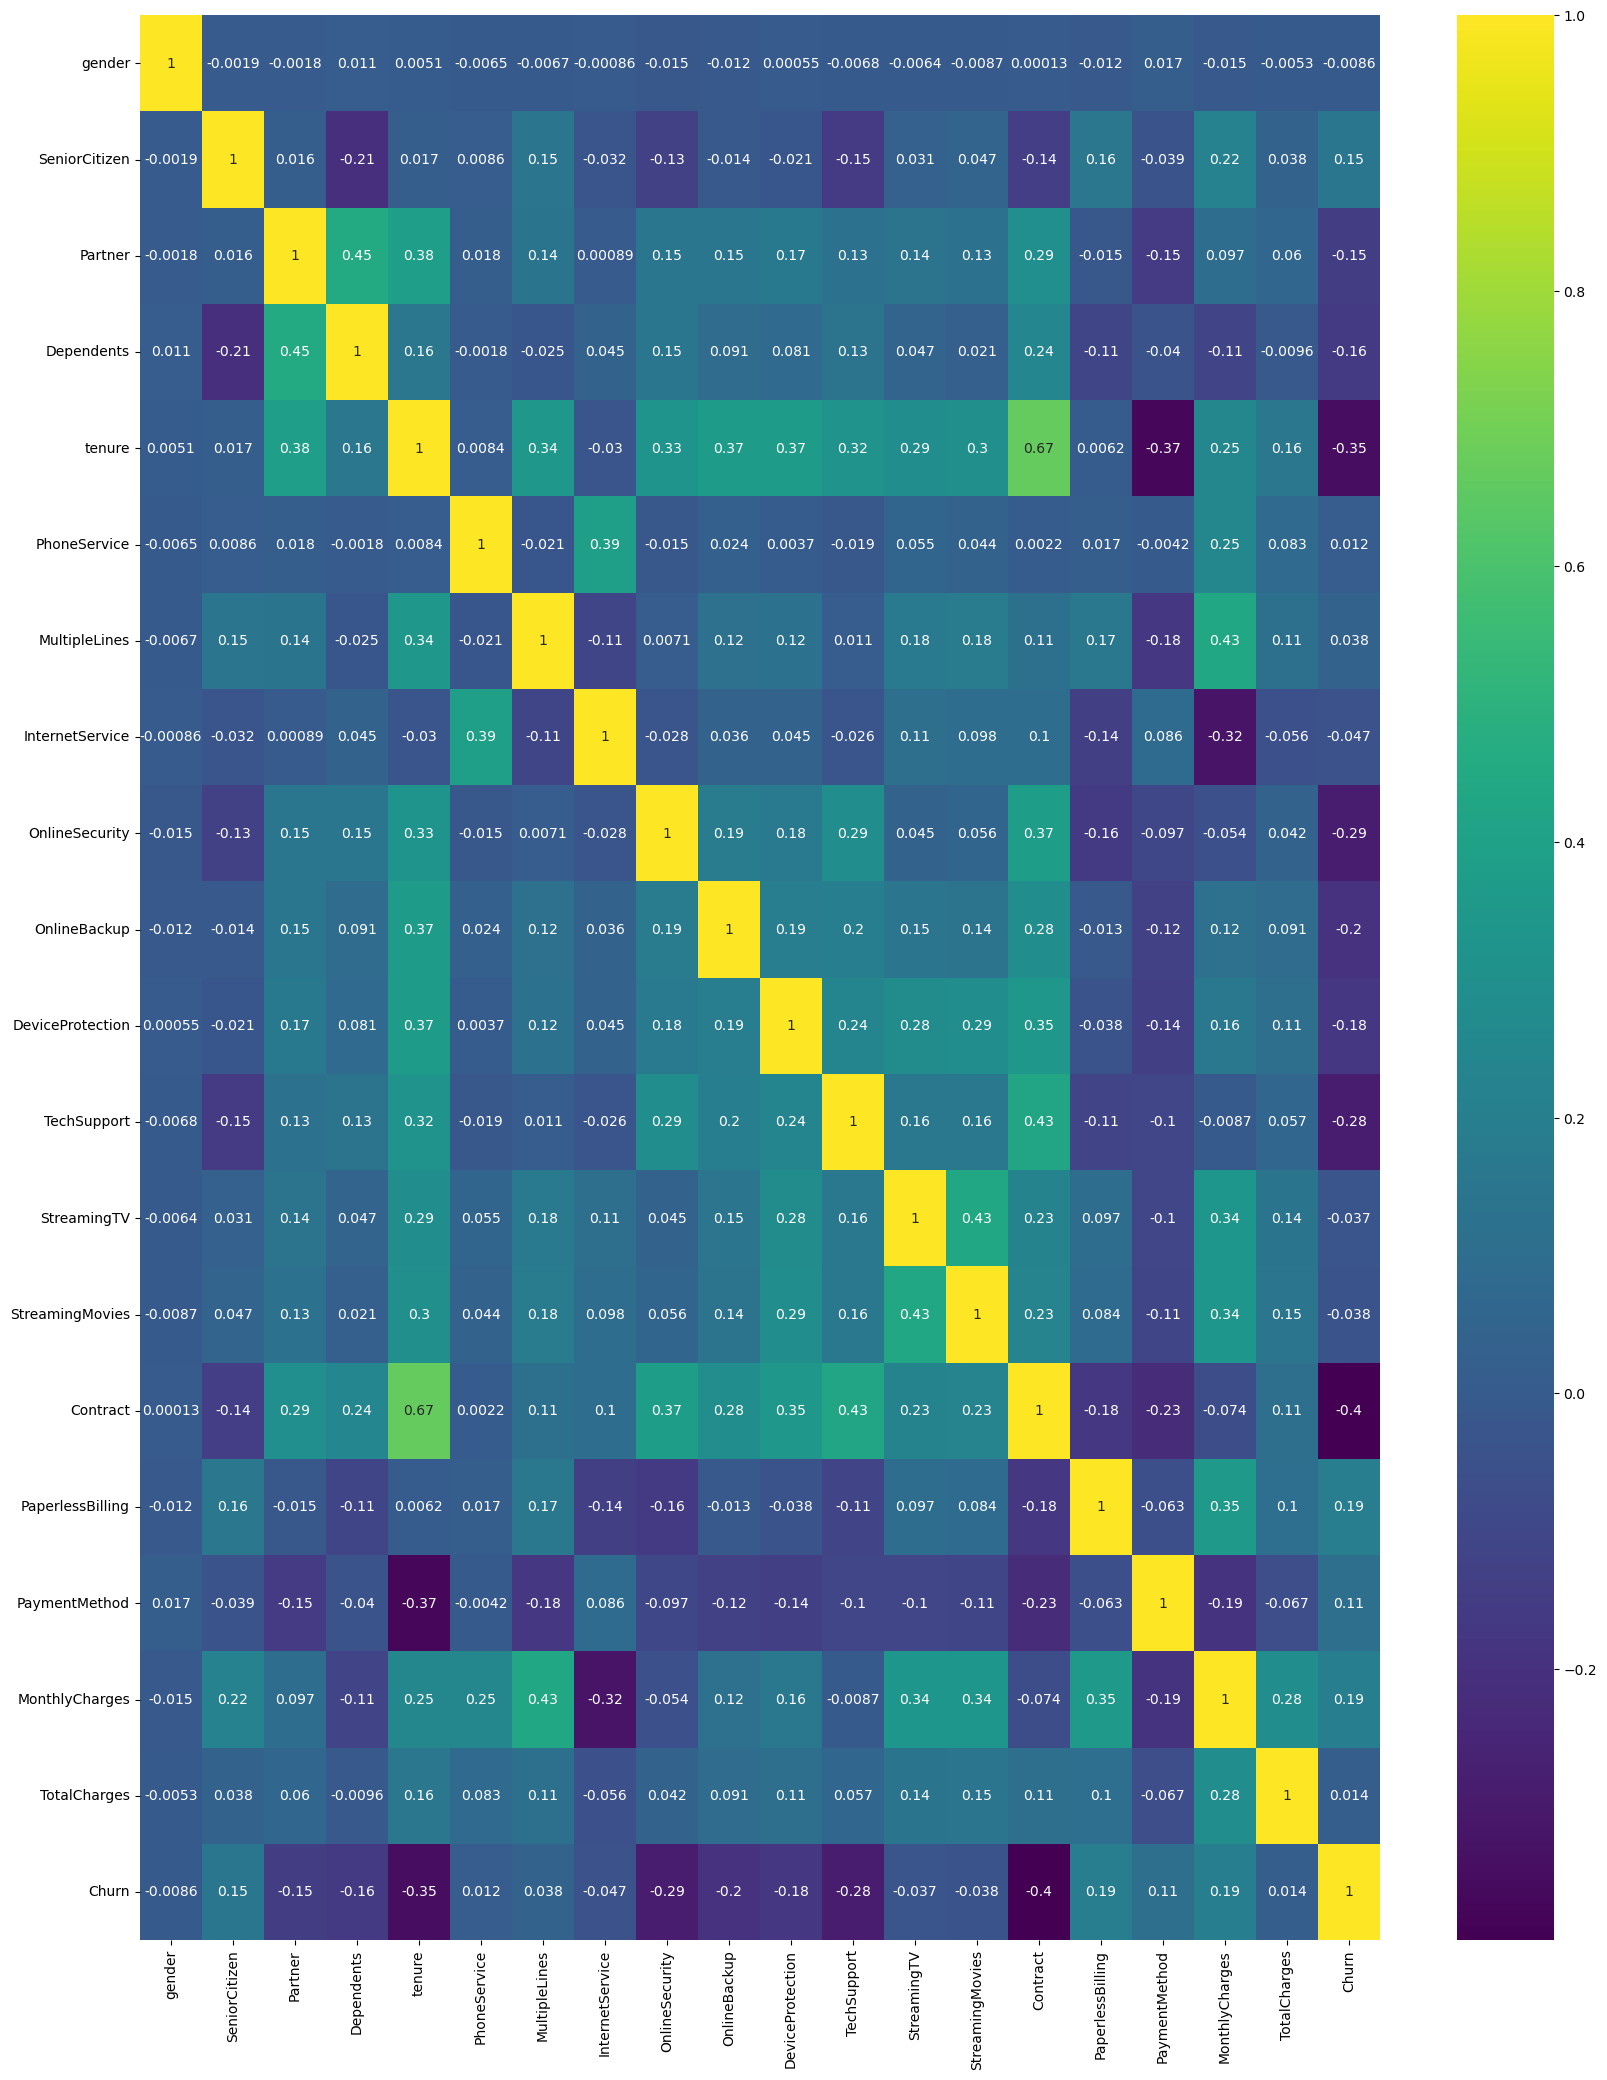

In [25]:
co_relation = df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(co_relation,annot=True,cmap='viridis')
plt.show()

In [26]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
mod = LogisticRegression()
mod.fit(x_train,y_train)
prediction = mod.predict(x_test)
print('Predictions:',prediction)

Predictions: [1 0 0 ... 0 0 1]


In [28]:
acc = accuracy_score(y_test,prediction)
print('Accuracy of model:',acc)
precision = precision_score(prediction,y_test)
print('Precision score of model:',precision)
recall = recall_score(prediction,y_test)
print('Recall score of model:',recall)
f1 = f1_score(prediction,y_test)
print('f1 score of model:',f1)
matrix = confusion_matrix(prediction,y_test)
print('Confusion matrix of model:\n',matrix)

Accuracy of model: 0.8140525195173882
Precision score of model: 0.5710455764075067
Recall score of model: 0.6761904761904762
f1 score of model: 0.6191860465116279
Confusion matrix of model:
 [[934 160]
 [102 213]]
